### Extract the data and run linear regression analysis on data

### STEP 1: Import Required Libraries

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Make plots display inline
%matplotlib inline


### STEP 2: Load the CSV File

In [8]:
file_path = r'C:\Users\pc\Desktop\dataanalysis\incd.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6
2,2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3
3,3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3
4,4,"Bibb County, Alabama(6,10)",1007,86.4,71,104.2,23,stable,-4.5,-31.4,32.9


### STEP 3: Clean and Prepare the Data

In [9]:
# Clean column names
df.columns = df.columns.str.strip()

# Check column names
df.columns


Index(['index', 'County', 'FIPS',
       'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1'],
      dtype='object')

### Show all actual column names

In [11]:
df.columns.tolist()


['index',
 'County',
 'FIPS',
 'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
 'Lower 95% Confidence Interval',
 'Upper 95% Confidence Interval',
 'Average Annual Count',
 'Recent Trend',
 'Recent 5-Year Trend (ˆ) in Incidence Rates',
 'Lower 95% Confidence Interval.1',
 'Upper 95% Confidence Interval.1']

### Rename / clean the column names

In [12]:
# Clean the column names: strip spaces and replace weird characters
df.columns = df.columns.str.strip().str.replace(r"[^\w\s\-]", "", regex=True)

# Print cleaned column names
df.columns.tolist()


['index',
 'County',
 'FIPS',
 'Age-Adjusted Incidence RateÊ - cases per 100000',
 'Lower 95 Confidence Interval',
 'Upper 95 Confidence Interval',
 'Average Annual Count',
 'Recent Trend',
 'Recent 5-Year Trend ˆ in Incidence Rates',
 'Lower 95 Confidence Interval1',
 'Upper 95 Confidence Interval1']

### Print the exact column names

In [22]:
print(df.columns.tolist())


['index', 'County', 'FIPS', 'Age-Adjusted Incidence RateÊ - cases per 100000', 'Lower 95 Confidence Interval', 'Upper 95 Confidence Interval', 'Average Annual Count', 'Recent Trend', 'Recent 5-Year Trend ˆ in Incidence Rates', 'Lower 95 Confidence Interval1', 'Upper 95 Confidence Interval1']


### Drop rows with missing values

In [20]:
df = df.dropna(subset=['Average Annual Count', 'Age-Adjusted Incidence RateÊ - cases per 100000'])


### Run linear regression

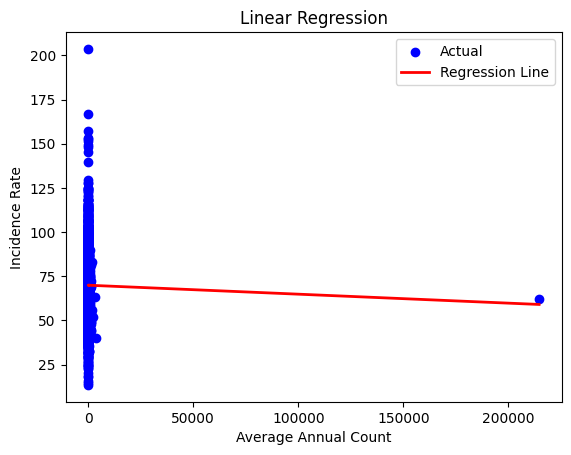

Intercept: 69.94749637018751
Slope: -5.0775314182621205e-05


In [21]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define features and target
X = df[['Average Annual Count']]  # independent variable
y = df['Age-Adjusted Incidence RateÊ - cases per 100000']  # dependent variable

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Average Annual Count')
plt.ylabel('Incidence Rate')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print model info
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")
